### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Data

In [2]:
batting = pd.read_csv('Batting_Dataset.csv')

In [3]:
batting.head()

,Player,Batting Handedness,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Position,Captain,Wicketkeeper
0,RG Sharma (IND),Right,9,9,1,648,140,81.00,659,98.33,5,1,-,67,14,Opener,No,No
1,DA Warner (AUS),Left,10,10,1,647,166,71.88,724,89.36,3,3,-,66,8,Opener,No,No
2,Shakib Al Hasan (BAN),Left,8,8,1,606,124*,86.57,631,96.03,2,5,-,60,2,All-rounder,No,No
3,KS Williamson (NZ),Right,10,9,2,578,148,82.57,771,74.96,2,2,-,50,3,Top-Order,Yes,No
4,JE Root (ENG),Right,11,11,2,556,107,61.77,621,89.53,2,3,-,48,2,Top-Order,No,No


In [4]:
bowling = pd.read_csv('Bowling_Dataset.csv')

In [5]:
bowling.head()

,Player,Mat,Inns,Balls,Overs,Mdns,Runs,Wkts,BBI,Ave,Econ,SR,4,5,Position
0,MA Starc (AUS),10,10,554,92.2,5,502,27,May-26,18.59,5.43,20.51,2,2,L.Pace
1,LH Ferguson (NZ),9,9,502,83.4,3,409,21,Apr-37,19.47,4.88,23.90,1,-,Pace
2,JC Archer (ENG),11,11,605,100.5,8,461,20,Mar-27,23.05,4.57,30.25,-,-,Pace
3,Mustafizur Rahman (BAN),8,8,433,72.1,2,484,20,May-59,24.20,6.70,21.65,-,2,L.Pace
4,JJ Bumrah (IND),9,9,504,84.0,9,371,18,Apr-55,20.61,4.41,28.00,1,-,Pace


# Data Visualization

###  Bar Graphs

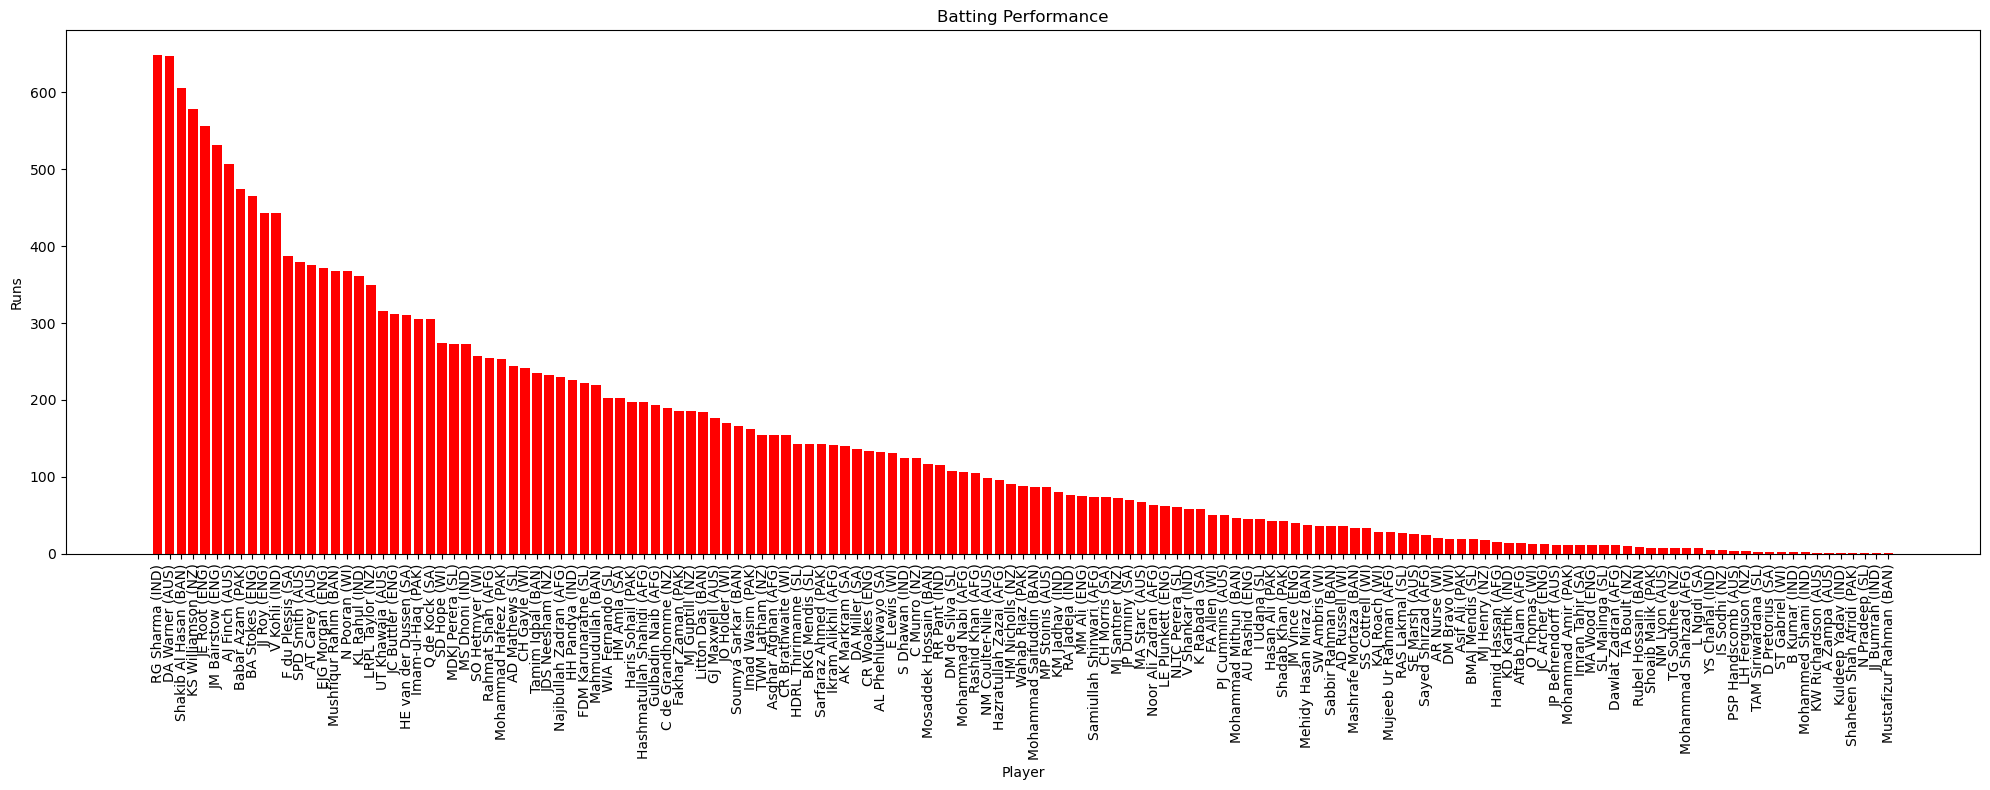

In [6]:
player_names = batting['Player']
runs = batting['Runs']

# Create a bar plot
plt.figure(figsize=(20, 8))  # Adjust the figure size
plt.bar(player_names, runs, color='red')

# Adding labels and title
plt.xlabel('Player')
plt.ylabel('Runs')
plt.title('Batting Performance')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()  # Ensures the plot layout is neat
plt.show()

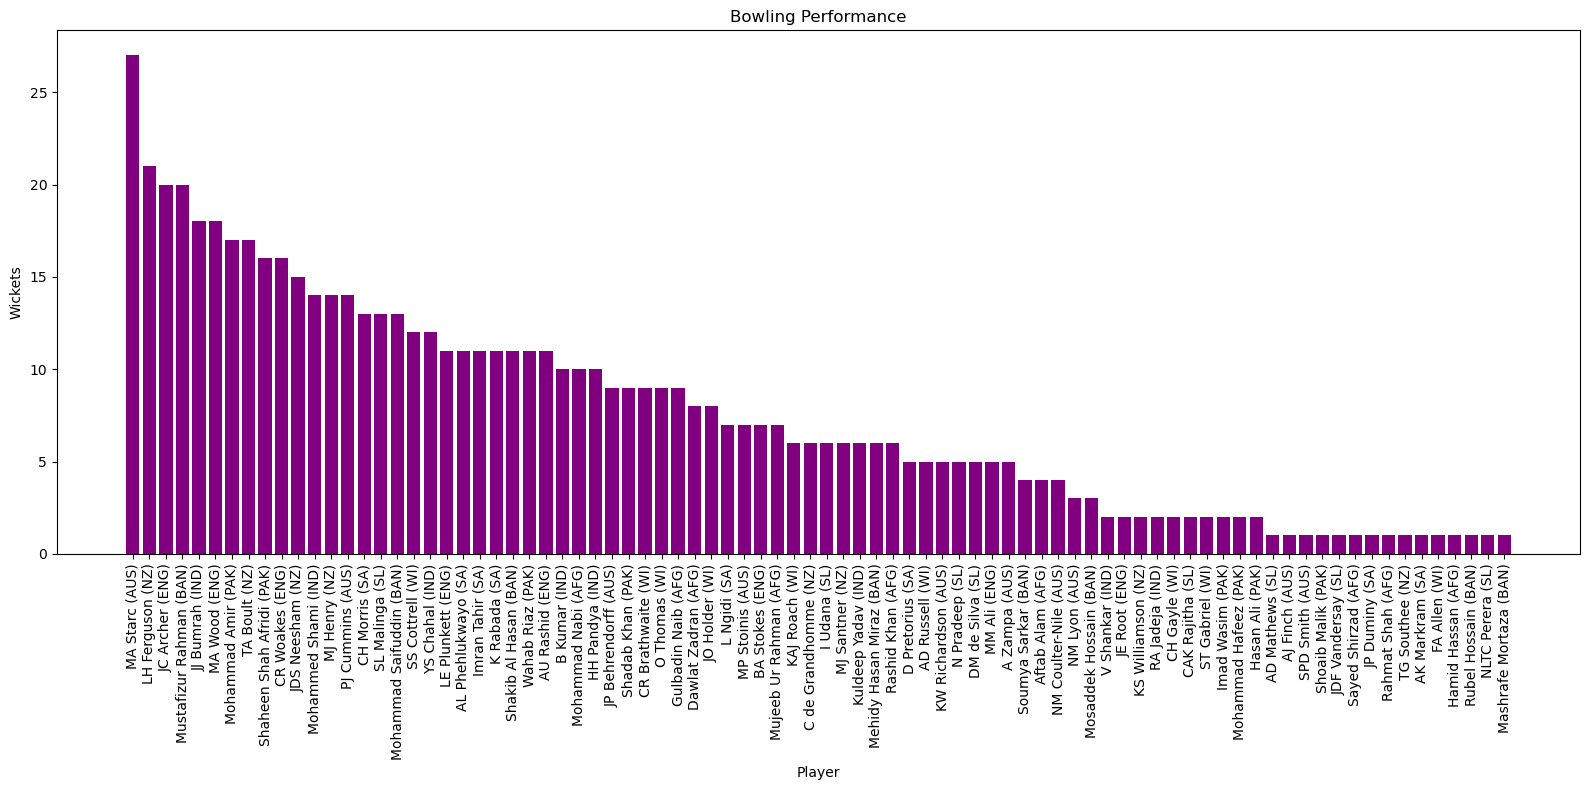

In [7]:
player_names = bowling['Player']
wickets = bowling['Wkts']

# Create a bar plot
plt.figure(figsize=(16, 8))  # Adjust the figure size
plt.bar(player_names, wickets,  color='purple')

# Adding labels and title
plt.xlabel('Player')
plt.ylabel('Wickets')
plt.title('Bowling Performance')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()  # Ensures the plot layout is neat
plt.show()

## Histogram

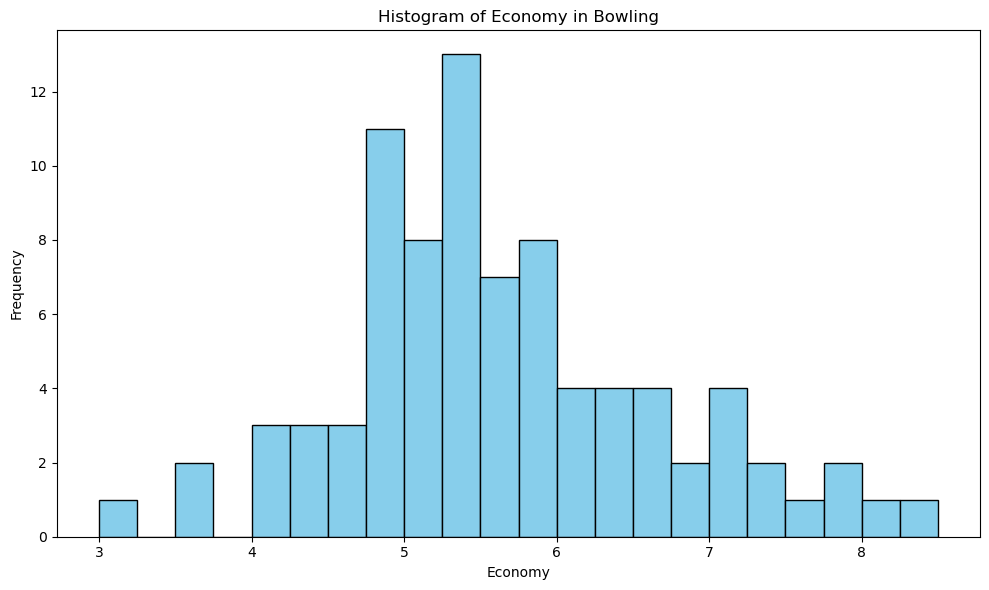

In [8]:
economy = bowling['Econ']

bin_range = (3, 8.5)  # Range from 3 to 9
num_bins = 22  # Number of bins

# Calculate the bin width
bin_width = (bin_range[1] - bin_range[0]) / num_bins

# Create a histogram with specified bins
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.hist(economy, bins=num_bins, range=bin_range, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Economy')
plt.ylabel('Frequency')
plt.title('Histogram of Economy in Bowling')

# Show the plot
plt.tight_layout() 
plt.show()

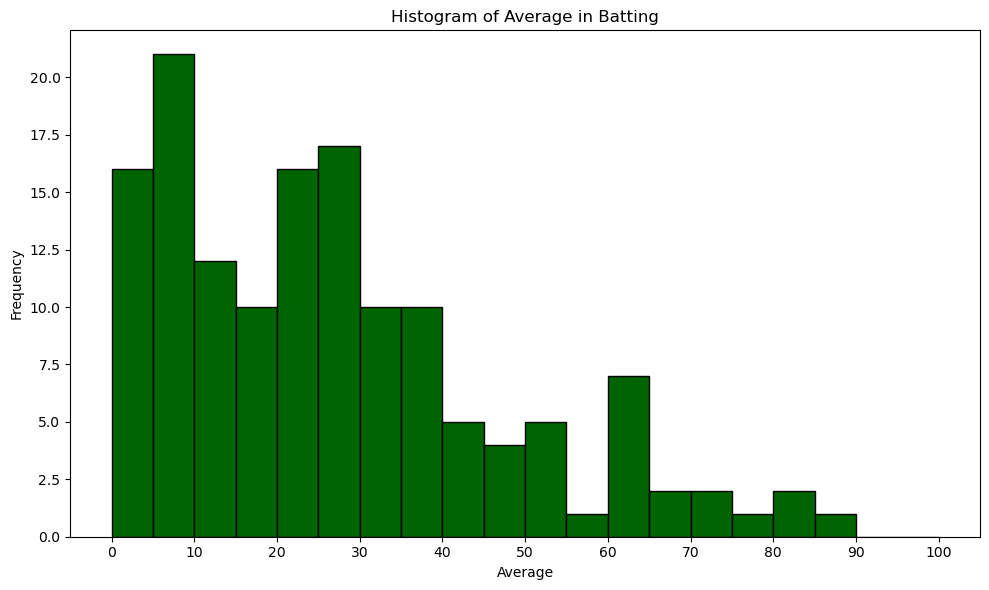

In [9]:
average = batting['Ave']

bin_range = (0, 100)  # Range from 3 to 9
num_bins = 20  # Number of bins

# Calculate the bin width
bin_width = (bin_range[1] - bin_range[0]) / num_bins

# Create a histogram with specified bins
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.hist(average, bins=num_bins, range=bin_range, color='darkgreen', edgecolor='black')

# Adding labels and title
plt.xlabel('Average')
plt.ylabel('Frequency')
plt.title('Histogram of Average in Batting')

# Show the plot
plt.xticks(range(0, 101, 10))
plt.tight_layout()  
plt.show()

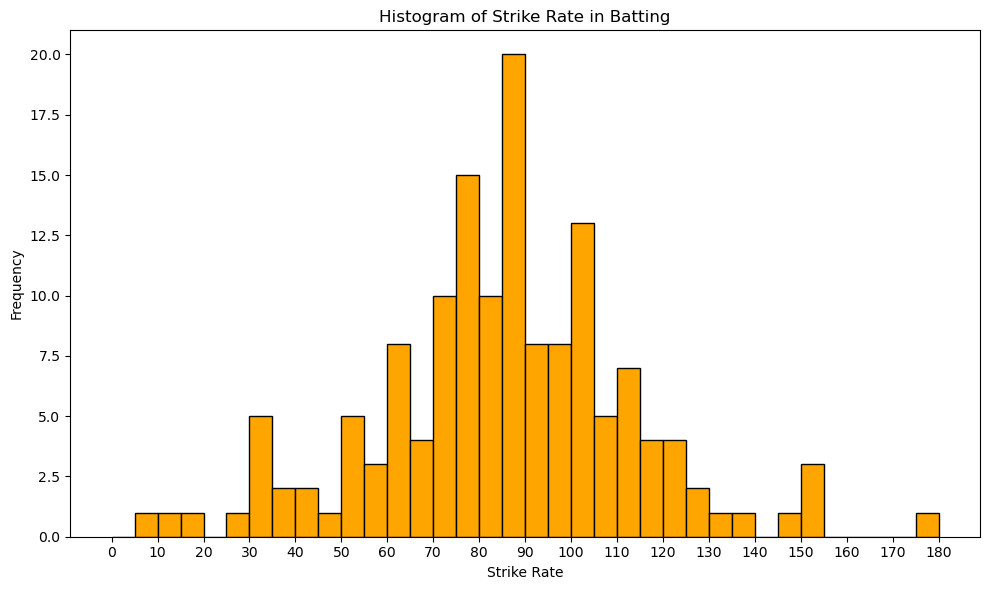

In [10]:
SR = batting['SR']


bin_range = (0, 180)  # Range from 3 to 9
num_bins = 36  # Number of bins

# Calculate the bin width
bin_width = (bin_range[1] - bin_range[0]) / num_bins

# Create a histogram with specified bins
plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.hist(SR, bins=num_bins, range=bin_range, color='orange', edgecolor='black')

# Adding labels and title
plt.xlabel('Strike Rate')
plt.ylabel('Frequency')
plt.title('Histogram of Strike Rate in Batting')

x_ticks = range(0, 181, 10)
plt.xticks(x_ticks)

# Show the plot
plt.tight_layout() 
plt.show()


## Scatter Plot

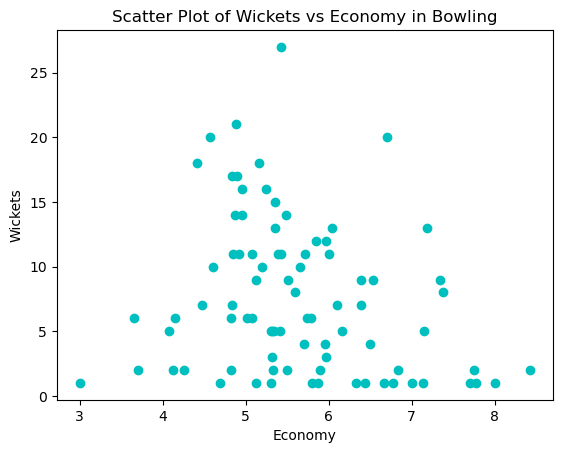

In [11]:
ec = bowling['Econ']
w = bowling['Wkts']
plt.scatter(ec, w, color='c')
plt.xlabel('Economy')
plt.ylabel('Wickets')
plt.title('Scatter Plot of Wickets vs Economy in Bowling')

plt.show()

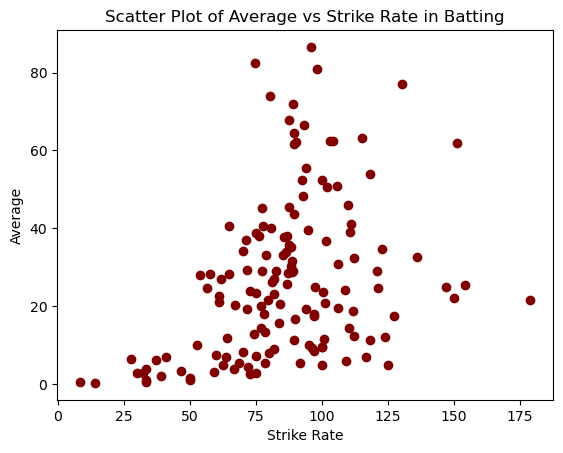

In [12]:
ave = batting['Ave']
sr = batting['SR']
plt.scatter(sr, ave, color='maroon')
plt.xlabel('Strike Rate')
plt.ylabel('Average')
plt.title('Scatter Plot of Average vs Strike Rate in Batting')

plt.show()

## Pairplot

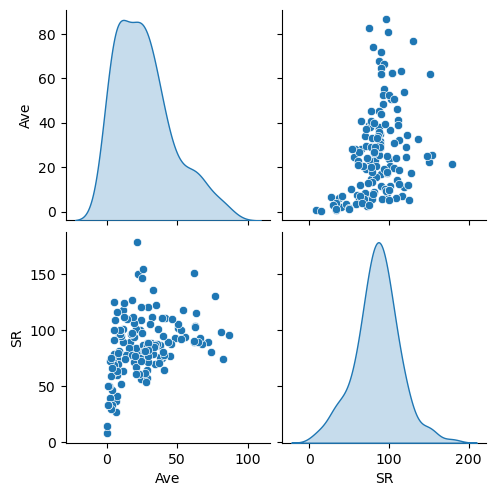

In [13]:
sns.pairplot(batting, vars=['Ave', 'SR'], diag_kind="kde")

# Show the plot
plt.show()

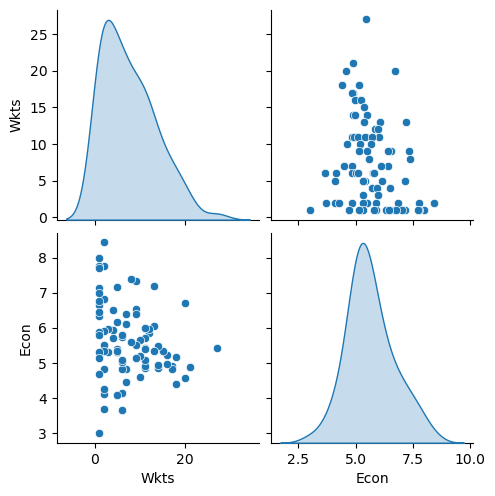

In [14]:
sns.pairplot(bowling, vars=['Wkts', 'Econ'], diag_kind="kde")

# Show the plot
plt.show()

## Pie Plot

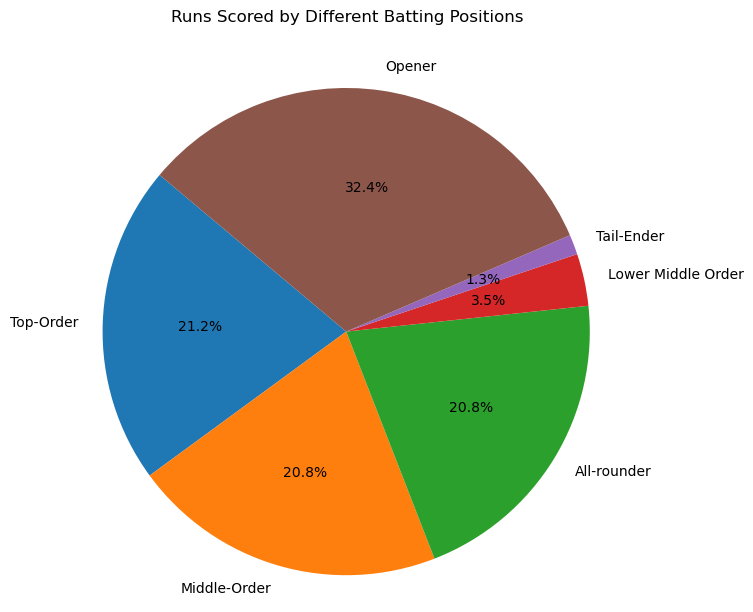

In [15]:
position_order = ['Top-Order', 'Middle-Order','All-rounder', 'Lower Middle Order', 'Tail-Ender', 'Opener']

batting['Position'] = pd.Categorical(batting['Position'], categories=position_order, ordered=True)

# Group the data by 'Position' and calculate the total runs for each position
position_runs = batting.groupby('Position')['Runs'].sum().reset_index()

# Create a pie plot
plt.figure(figsize=(7, 7))  
plt.pie(position_runs['Runs'], labels=position_runs['Position'], autopct='%1.1f%%', startangle=140)

# Adding a title
plt.title('Runs Scored by Different Batting Positions', pad=30)

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.show()

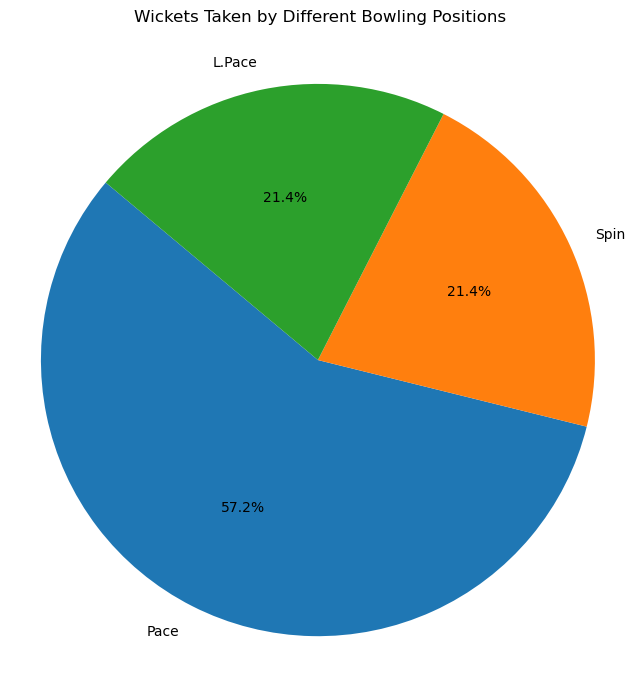

In [16]:
position_order = ['Pace', 'Spin', 'L.Pace']

# Convert the 'Position' column to a categorical data type with custom ordering
bowling['Position'] = pd.Categorical(bowling['Position'], categories=position_order, ordered=True)

# Group the data by 'Position' and calculate the total wickets for each position
position_wickets = bowling.groupby('Position')['Wkts'].sum().reset_index()

# Create a pie plot
plt.figure(figsize=(8, 8)) 

# Adding a title with some padding
plt.title('Wickets Taken by Different Bowling Positions', pad=20)  # Increase the pad to add more space

# Create the pie chart
plt.pie(position_wickets['Wkts'], labels=position_wickets['Position'], autopct='%1.1f%%', startangle=140)

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.
plt.show()

In [17]:
spin_bowlers = bowling[bowling['Position'] == 'L.Pace']

# Calculate the sum of wickets taken by spin bowlers
total_wickets_by_spin = spin_bowlers['Wkts'].sum()

print("Total wickets taken by spin bowlers:", total_wickets_by_spin)

Total wickets taken by spin bowlers: 136


# Starting the Dream Team Selection 

In the team formation, we require :
- 2 Openers
- 2 Top-Order Batsmen
- 1 Middle-Order Batsman
- 2 All-Rounders
- 1 Spin Bowler
- 3 Fast Bowlers

Thus, this constitutes a total team of 11 players.

### Batting Attributes

A wicket basically means an out (like baseball). Each batsman gets only one wicket to bat in every match. So, if a batsman gets out, then he can't bat anymore in that particular match. 
The goal of a batsman is to score as many runs as possible before getting out. Scoring them at a fast rate is also essential.

- Two key attributes are used in analyzing the performance of batsmen : their average and batting strike rate. 
- Average indicates how consistent a player is. An average of 35 means that the player scores 35 runs (on average) per match.
- Batting strike rate determines how fast a player scores runs. A batting strike rate of 147 means the batsman scores on average 147 runs per 100 balls. 
- Hence, the higher the average and higher the batting strike rate, the better the batsman is.

## Selecting the 2 Openers

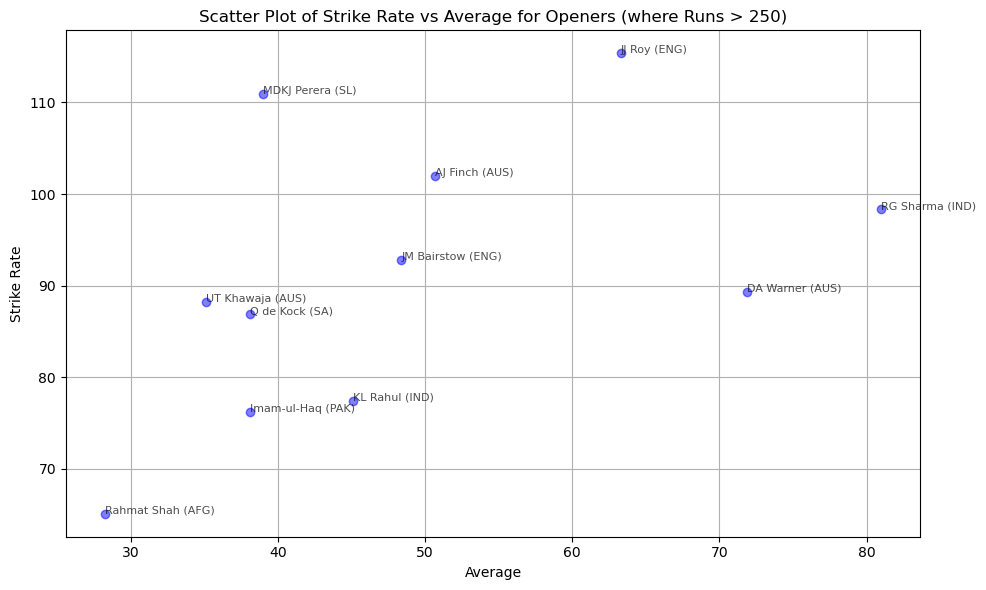

In [18]:
openers_above_250 = batting[(batting['Position'] == 'Opener') & (batting['Runs'] > 250)]

# Create a scatter plot 
plt.figure(figsize=(10, 6))  # Adjust the figure size

# Scatter plot
scatter = plt.scatter(openers_above_250['Ave'], openers_above_250['SR'], alpha=0.5, color='blue')

# Adding labels and title
plt.xlabel('Average')
plt.ylabel('Strike Rate')
plt.title('Scatter Plot of Strike Rate vs Average for Openers (where Runs > 250)')

# Add player names near the dots
for i, player in openers_above_250.iterrows():
    plt.annotate(player['Player'], (player['Ave'], player['SR']), fontsize=8, alpha=0.7)

# Show the plot
plt.grid(True)  
plt.tight_layout() 
plt.show()

### Batting_Score

It can be difficult to compare batsmen, as one batsman may have a higher average, while the other may have a higher batting strike rate. In such cases, it can be confusing to determine which batsman has displayed better performance. In this scenario, the Batting_Score metric can be used for comparison. It is derived from the product of average and strike rate, making it a fair metric that takes both key attributes into account.

In [19]:
openers_above_250 = batting[(batting['Position'] == 'Opener') & (batting['Runs'] > 250)].copy()

# Calculate batting score (Average x Strike Rate)
openers_above_250['Batting_Score'] = openers_above_250['Ave'] * openers_above_250['SR']

# Sort the DataFrame by Batting_Score in descending order
sorted_openers = openers_above_250.sort_values(by='Batting_Score', ascending=False)

# Display the sorted DataFrame with openers ranked by Batting_Score
print(sorted_openers[['Player', 'Ave', 'SR', 'Runs', 'Batting_Score']])

               Player    Ave      SR  Runs  Batting_Score
0     RG Sharma (IND)  81.00   98.33   648      7964.7300
9        JJ Roy (ENG)  63.28  115.36   443      7299.9808
1     DA Warner (AUS)  71.88   89.36   647      6423.1968
6      AJ Finch (AUS)  50.70  102.01   507      5171.9070
5   JM Bairstow (ENG)  48.36   92.84   532      4489.7424
25   MDKJ Perera (SL)  39.00  110.97   273      4327.8300
17     KL Rahul (IND)  45.12   77.46   361      3494.9952
23     Q de Kock (SA)  38.12   86.89   305      3312.2468
19   UT Khawaja (AUS)  35.11   88.26   316      3098.8086
22  Imam-ul-Haq (PAK)  38.12   76.25   305      2906.6500
28  Rahmat Shah (AFG)  28.22   65.12   254      1837.6864


### **Analysis Explanation:** 

- Among the openers, **Rohit Sharma** has the highest average and 4th highest strike rate, hence he is chosen.
- Among the openers, David Warner has the 2nd highest average, while Jason Roy has the 3rd highest average. However, J.Roy has a much higher strike rate than D.Warner. The difference is 26, which is a significantly larger margin compared to the difference in their averages (which is only 8). Therefore, **J. Roy is chosen**.
- Even the **batting_score which is the product of average and strike rate** supports our selection as these 2 openers are on the top of the Batting_score List.

In [20]:
# Creating a new dataframe for chosen players

names_to_extract = ['RG Sharma (IND)', 'JJ Roy (ENG)']

# Extract rows based on the name
filtered_rows = batting[batting['Player'].isin(names_to_extract)]

# Create a new DataFrame with the extracted rows
chosen_11 = pd.DataFrame(filtered_rows)

## Selecting the 2 Top-Order Batsmen

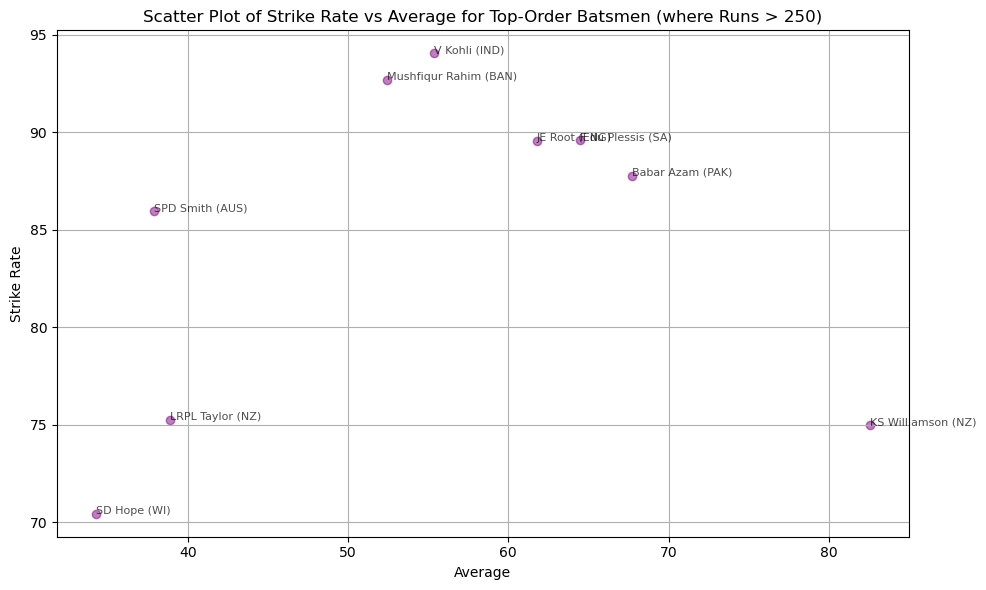

In [21]:
top_order_above_250 = batting[(batting['Position'] == 'Top-Order') & (batting['Runs'] > 250)]

# Create a scatter plot 
plt.figure(figsize=(10, 6))  # Adjust the figure size

# Scatter plot
scatter = plt.scatter(top_order_above_250['Ave'], top_order_above_250['SR'], alpha=0.5, color='purple')

# Adding labels and title
plt.xlabel('Average')
plt.ylabel('Strike Rate')
plt.title('Scatter Plot of Strike Rate vs Average for Top-Order Batsmen (where Runs > 250)')

# Add player names near the dots
for i, player in top_order_above_250.iterrows():
    plt.annotate(player['Player'], (player['Ave'], player['SR']), fontsize=8, alpha=0.7)

# Show the plot
plt.grid(True) 
plt.tight_layout() 
plt.show()

In [22]:
top_order_above_250 = batting[(batting['Position'] == 'Top-Order') & (batting['Runs'] > 250)].copy()

# Calculate batting score (Average x Strike Rate)
top_order_above_250['Batting_Score'] = top_order_above_250['Ave'] * top_order_above_250['SR']

# Sort the DataFrame by Batting_Score in descending order
sorted_top = top_order_above_250.sort_values(by='Batting_Score', ascending=False)

# Display the sorted DataFrame with top-order batsmen ranked by Batting_Score
print(sorted_top[['Player', 'Ave', 'SR', 'Runs', 'Batting_Score']])

                   Player    Ave     SR  Runs  Batting_Score
3      KS Williamson (NZ)  82.57  74.96   578      6189.4472
7        Babar Azam (PAK)  67.71  87.77   474      5942.9067
11      F du Plessis (SA)  64.50  89.58   387      5777.9100
4           JE Root (ENG)  61.77  89.53   556      5530.2681
10          V Kohli (IND)  55.37  94.05   443      5207.5485
15  Mushfiqur Rahim (BAN)  52.42  92.67   367      4857.7614
12        SPD Smith (AUS)  37.90  85.94   379      3257.1260
18       LRPL Taylor (NZ)  38.88  75.26   350      2926.1088
24           SD Hope (WI)  34.25  70.43   274      2412.2275


### **Analysis Explanation:** 

- Among the top-order batsmen, **K.Williamson** has the highest average. Though his strike rate is low, his average is far above the rest. Being a top-order batsmen, average matters much more than strike rate as they have to set the foundation for the innings and hence need to bat slowly sometimes. Thus, K.Williamson is chosen. Besides, he is also on top of the Batting_Score List.
- As seen in the scatter plot, it is difficult to identify a clear favourite among the next 4 batsmen. Hence, we look at the Batting_Score List to make a decision. **Babar Azam** is 2nd and has the highest batting_score among these 4 batsmen. Thus, he is chosen.

In [23]:
# Adding the top-order batsmen to the team

names_to_extract = ['KS Williamson (NZ)', 'Babar Azam (PAK)']

# Extract rows based on the name
filtered_rows = batting[batting['Player'].isin(names_to_extract)]

# Add the extracted rows to team
chosen_11 = pd.concat([chosen_11,filtered_rows])

## Selecting the Middle-Order Batsman

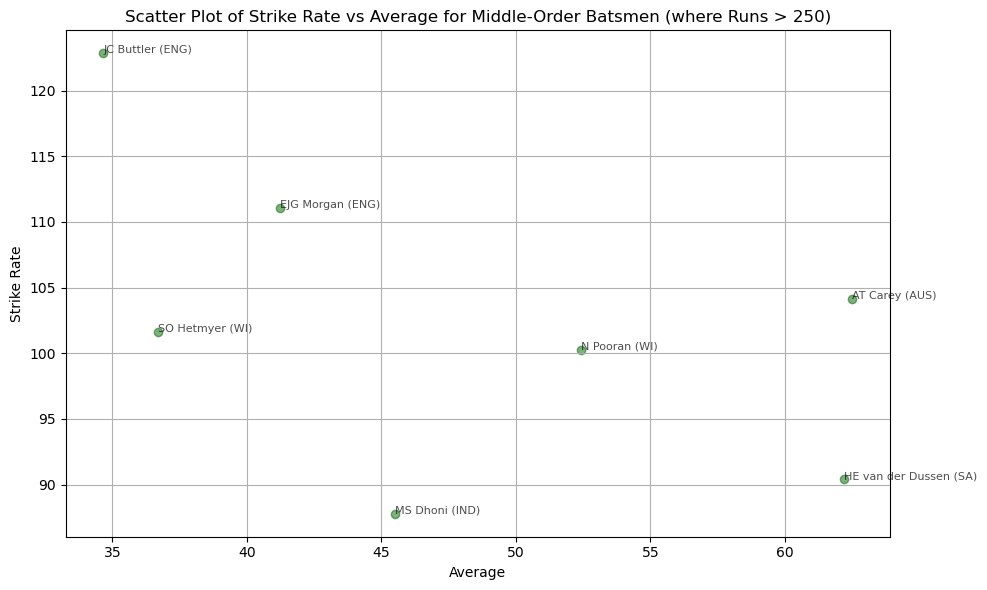

In [24]:
middle_above_250 = batting[(batting['Position'] == 'Middle-Order') & (batting['Runs'] > 250)]

# Create a scatter plot 
plt.figure(figsize=(10, 6))  

# Scatter plot
scatter = plt.scatter(middle_above_250['Ave'], middle_above_250['SR'], alpha=0.5, color='darkgreen')

# Adding labels and title
plt.xlabel('Average')
plt.ylabel('Strike Rate')
plt.title('Scatter Plot of Strike Rate vs Average for Middle-Order Batsmen (where Runs > 250)')

# Add player names near the dots
for i, player in middle_above_250.iterrows():
    plt.annotate(player['Player'], (player['Ave'], player['SR']), fontsize=8, alpha=0.7)

# Show the plot
plt.grid(True)  
plt.tight_layout()  
plt.show()

In [25]:
middle_above_250 = batting[(batting['Position'] == 'Middle-Order') & (batting['Runs'] > 250)].copy()

# Calculate batting score (Average x Strike Rate)
middle_above_250['Batting_Score'] = middle_above_250['Ave'] * middle_above_250['SR']

# Sort the DataFrame by Batting_Score in descending order
sorted_middle = middle_above_250.sort_values(by='Batting_Score', ascending=False)

# Display the sorted DataFrame with middle-order batsmen ranked by Batting_Score
print(sorted_middle[['Player', 'Ave', 'SR', 'Runs', 'Batting_Score']])

                    Player    Ave      SR  Runs  Batting_Score
13          AT Carey (AUS)  62.50  104.16   375      6510.0000
21  HE van der Dussen (SA)  62.20   90.40   311      5622.8800
16           N Pooran (WI)  52.42  100.27   367      5256.1534
14        EJG Morgan (ENG)  41.22  111.07   371      4578.3054
20        JC Buttler (ENG)  34.66  122.83   312      4257.2878
26          MS Dhoni (IND)  45.50   87.78   273      3993.9900
27         SO Hetmyer (WI)  36.71  101.58   257      3729.0018


### **Analysis Explanation:** 

- J.Buttler has an extremely high strike rate however his average is low, hence he is inconsistent and thus rejected.
- The difference between E.Morgan and A.Carey's strike rates are marginal however the difference in average is quite vast hence A.Carey is the preferred option as his average is much higher compared to E.Morgan.
- Our decision is supported by the Batting_score List in which **A.Carey** has the highest batting_score. 

In [26]:
# Adding the middle-order batsmen to the team

names_to_extract = ['AT Carey (AUS)']

# Extract rows based on the name
filtered_rows = batting[batting['Player'].isin(names_to_extract)]

# Add the extracted rows to team
chosen_11 = pd.concat([chosen_11,filtered_rows])

## Selecting the 2 All-Rounders

In cricket, an all-rounder is someone who excels in both batting and bowling. Hence, 2 all-rounders must be chosen on the basis of a holistic analysis of their skills in both departments.

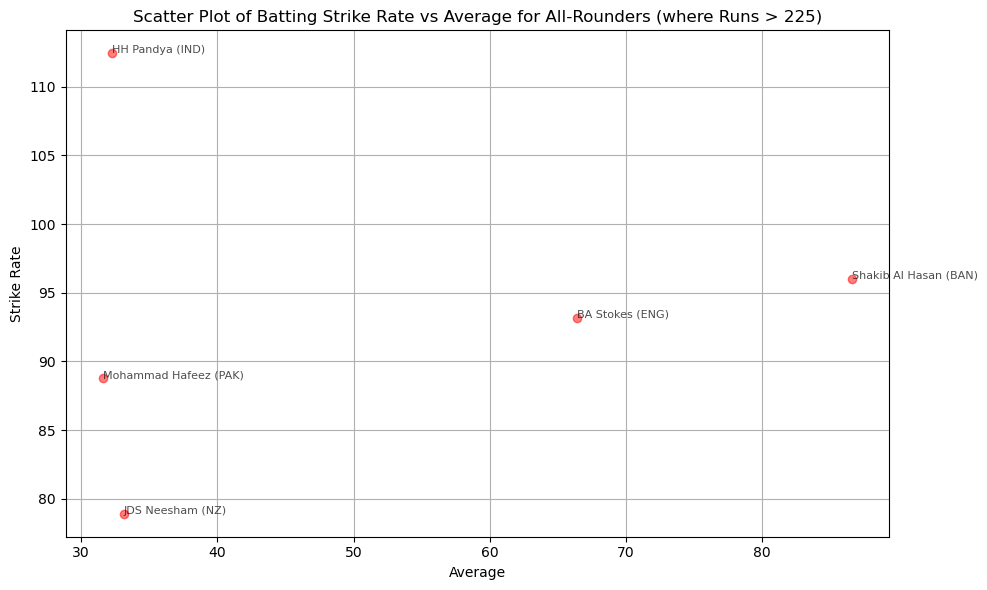

In [27]:
all_rounder_above_225 = batting[(batting['Position'] == 'All-rounder') & (batting['Runs'] > 225)]

# Create a scatter plot 
plt.figure(figsize=(10, 6))

# Scatter plot
scatter = plt.scatter(all_rounder_above_225['Ave'], all_rounder_above_225['SR'], alpha=0.5, color='red')

# Adding labels and title
plt.xlabel('Average')
plt.ylabel('Strike Rate')
plt.title('Scatter Plot of Batting Strike Rate vs Average for All-Rounders (where Runs > 225)')

# Add player names near the dots
for i, player in all_rounder_above_225.iterrows():
    plt.annotate(player['Player'], (player['Ave'], player['SR']), fontsize=8, alpha=0.7)

# Show the plot
plt.grid(True)  
plt.tight_layout() 
plt.show()

In [28]:
all_rounder_above_225 = batting[(batting['Position'] == 'All-rounder') & (batting['Runs'] > 225)].copy()

# Calculate batting score (Average x Strike Rate)
all_rounder_above_225['Batting_Score'] = all_rounder_above_225['Ave'] * all_rounder_above_225['SR']

# Sort the DataFrame by Batting_Score in descending order
sorted_all_rounders = all_rounder_above_225.sort_values(by='Batting_Score', ascending=False)

# Display the sorted DataFrame with All-Rounders ranked by Batting_Score
print(sorted_all_rounders[['Player', 'Ave', 'SR', 'Runs', 'Batting_Score']])

                   Player    Ave      SR  Runs  Batting_Score
2   Shakib Al Hasan (BAN)  86.57   96.03   606      8313.3171
8         BA Stokes (ENG)  66.42   93.18   465      6189.0156
35        HH Pandya (IND)  32.28  112.43   226      3629.2404
29  Mohammad Hafeez (PAK)  31.62   88.77   253      2806.9074
33       JDS Neesham (NZ)  33.14   78.91   232      2615.0774


### Creating a merged dataset combining both Batting and Bowling statistics

In [29]:
merged_data = pd.merge(batting, bowling, on='Player', how='inner')
merged_data

,Player,Batting Handedness,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Mdns,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Position_y
0,Shakib Al Hasan (BAN),Left,8,8,1,606,124*,86.57,631,96.03,...,1,399,11,May-29,36.27,5.39,40.36,-,1,Spin
1,KS Williamson (NZ),Right,10,9,2,578,148,82.57,771,74.96,...,-,64,2,Jan-25,32.00,4.26,45.00,-,-,Spin
2,JE Root (ENG),Right,11,11,2,556,107,61.77,621,89.53,...,-,55,2,Feb-27,27.50,5.50,30.00,-,-,Spin
3,AJ Finch (AUS),Right,10,10,0,507,153,50.70,497,102.01,...,-,20,1,Jan-13,20.00,6.66,18.00,-,-,Spin
4,BA Stokes (ENG),Left,11,10,3,465,89,66.42,499,93.18,...,1,246,7,Mar-23,35.14,4.83,43.57,-,-,Pace
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Kuldeep Yadav (IND),Left,7,2,2,1,1*,NaN,2,50.00,...,2,337,6,Feb-32,56.16,5.02,67.00,-,-,Spin
78,Shaheen Shah Afridi (PAK),Left,5,2,2,1,1*,NaN,6,16.66,...,3,234,16,Jun-35,14.62,4.96,17.68,1,1,L.Pace
79,N Pradeep (SL),Right,3,3,1,1,1*,0.50,12,8.33,...,2,157,5,Apr-31,31.40,5.41,34.80,1,-,Pace
80,JJ Bumrah (IND),Right,9,3,3,1,1*,NaN,1,100.00,...,9,371,18,Apr-55,20.61,4.41,28.00,1,-,Pace


### Bowling Attributes

Each bowler is allocated 10 overs (60 balls) to bowl in a match. The goal of a bowler is to try and take wickets of opposing batsmen and concede as few runs as possible.

- Two key attributes are used in analyzing bowling : economy and bowling strike rate. 
- Economy indicates how many runs a bowler concedes, on average, per over. An economy of 4.8 means that the player concedes 4.8 runs (on average) every over (4.8 runs every 6 balls). Thus, a low economy means that the bowler does a good job by conceding few runs.
- Bowling strike rate conveys how fast a bowler takes wickets. A bowling strike rate of 30 means the bowler takes a wicket every 30 balls. So, if he bowls 60 balls, he will most likely take 2 wickets. Thus, a lower bowling strike rate shows that the bowler takes wickets at a faster rate.
- Hence, <b> the lower the economy and lower the bowling strike rate, the better the bowler is.</b>

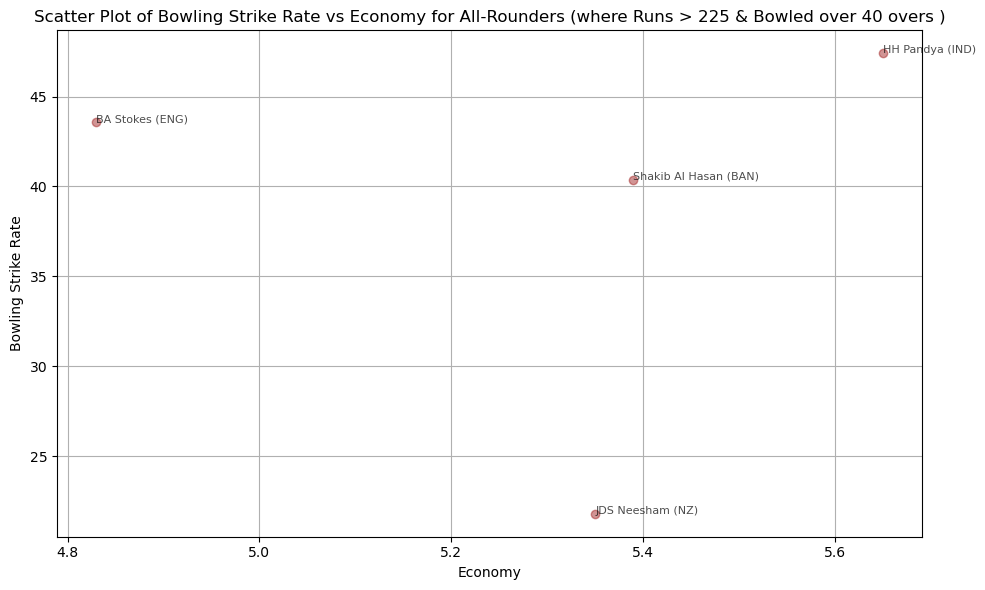

In [30]:
merged_data = pd.merge(batting, bowling, on='Player', how='inner')

all_rounder_above_225 = merged_data[(merged_data['Position_x'] == 'All-rounder') & (merged_data['Runs_x'] > 225) & (merged_data['Overs'] > 40)].copy()

# Create a scatter plot 
plt.figure(figsize=(10, 6))  

# Scatter plot
scatter = plt.scatter(all_rounder_above_225['Econ'], all_rounder_above_225['SR_y'], alpha=0.5, color='brown')

# Adding labels and title
plt.xlabel('Economy')
plt.ylabel('Bowling Strike Rate')
plt.title('Scatter Plot of Bowling Strike Rate vs Economy for All-Rounders (where Runs > 225 & Bowled over 40 overs )')

# Add player names near the dots
for i, player in all_rounder_above_225.iterrows():
    plt.annotate(player['Player'], (player['Econ'], player['SR_y']), fontsize=8, alpha=0.7)

# Show the plot
plt.grid(True)  # Add gridlines
plt.tight_layout() 
plt.show()


### Bowling_Score

Similar to Batting_Score, there exists something called Bowling_Score. It is derived from the product of economy and bowling strike rate. Given that a low economy and low bowling strike rate are indicative of superior performance, it follows that a low Bowling_Score is considered a positive indicator of a bowler's effectiveness.

In [31]:
# Calculate Bowling_Score (Bowling Strike Rate x Economy)
all_rounder_above_225['Bowling_Score'] = all_rounder_above_225['SR_y'] * all_rounder_above_225['Econ'].copy()

# Sort the DataFrame by Bowling_Score in ascending order
sorted_all_rounders = all_rounder_above_225.sort_values(by='Bowling_Score', ascending=True)

# Display the sorted DataFrame with All-Rounders ranked by Bowling_Score
print(sorted_all_rounders[['Player', 'SR_y', 'Ave_y','Econ', 'Wkts', 'Bowling_Score']])

                   Player   SR_y  Ave_y  Econ  Wkts  Bowling_Score
10       JDS Neesham (NZ)  21.80  19.46  5.35    15       116.6300
4         BA Stokes (ENG)  43.57  35.14  4.83     7       210.4431
0   Shakib Al Hasan (BAN)  40.36  36.27  5.39    11       217.5404
11        HH Pandya (IND)  47.40  44.70  5.65    10       267.8100


### **Analysis Explanation for All-Rounders:** 

- The data shows that among the all-rounders, Shakib Al Hasan, BA Stokes and HH Pandya have the top 3 batting statistics while JDS Neesham, BA Stokes and Shakib Al Hasan rank in the top 3 for bowling statistics.
- All-rounders need to be equally good at both batting and bowling. **Shakib Al Hasan and BA Stokes** feature in the top 3 for both departments and thus will be the 2 chosen all-rounders.

In [32]:
# Adding the all-rounders to the team

names_to_extract = ['Shakib Al Hasan (BAN)','BA Stokes (ENG)']

# Extract rows based on the name
filtered_rows = batting[batting['Player'].isin(names_to_extract)]

# Add the extracted rows to team
chosen_11 = pd.concat([chosen_11,filtered_rows])

## Selecting the Spin Bowler

The World Cup was played in England under swinging conditions, which are more suited to fast bowlers. Therefore, only one spinner is needed in the team, along with three fast bowlers.

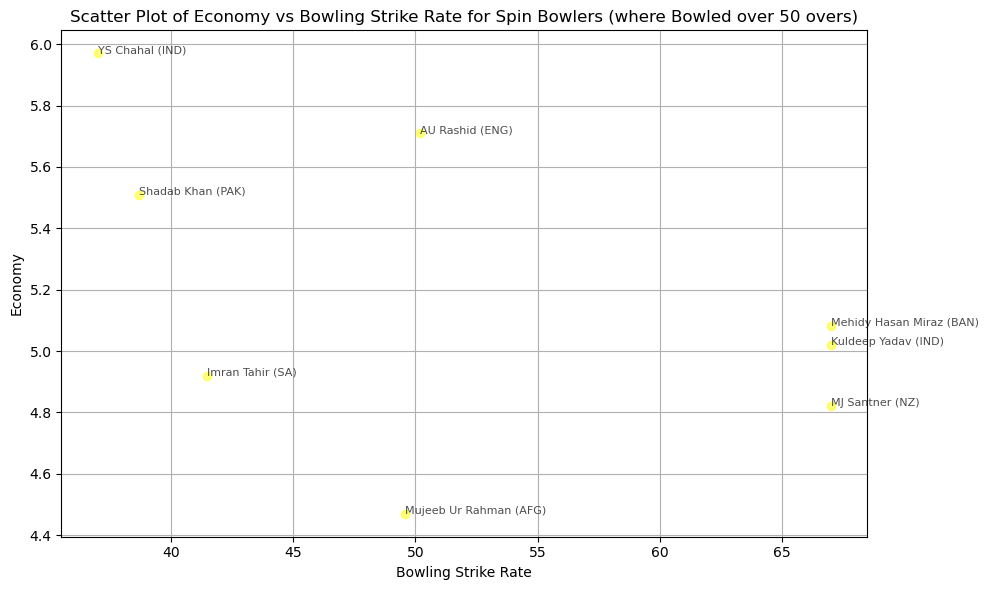

In [33]:
spin_above_50 = bowling[(bowling['Position'] == 'Spin') & (bowling['Overs'] > 50)]


m = merged_data[(merged_data['Position_x'] == 'All-rounder')].copy()

all_rounder_names = m['Player'].tolist()

filtered_spin_above_50 = spin_above_50[~spin_above_50['Player'].isin(all_rounder_names)].copy()
# Create a scatter plot 
plt.figure(figsize=(10, 6))  

# Scatter plot
scatter = plt.scatter(filtered_spin_above_50['SR'], filtered_spin_above_50['Econ'], alpha=0.5, color='yellow')

# Adding labels and title
plt.xlabel('Bowling Strike Rate')
plt.ylabel('Economy')
plt.title('Scatter Plot of Economy vs Bowling Strike Rate for Spin Bowlers (where Bowled over 50 overs)')

# Add player names near the dots
for i, player in filtered_spin_above_50.iterrows():
    plt.annotate(player['Player'], (player['SR'], player['Econ']), fontsize=8, alpha=0.7)

# Show the plot
plt.grid(True)
plt.tight_layout()  
plt.show()

In [34]:
# Calculate Bowling_Score (Bowling Strike Rate x Economy)
filtered_spin_above_50['Bowling_Score'] = filtered_spin_above_50['SR'] * filtered_spin_above_50['Econ'].copy()

# Sort the DataFrame by Bowling_Score in ascending order
sorted_spin = filtered_spin_above_50.sort_values(by='Bowling_Score', ascending=True)

# Display the sorted DataFrame with Spinners ranked by Bowling_Score
print(sorted_spin[['Player', 'SR', 'Ave','Econ', 'Wkts', 'Bowling_Score']])

                      Player     SR    Ave  Econ  Wkts  Bowling_Score
21          Imran Tahir (SA)  41.45  34.00  4.92    11       203.9340
30         Shadab Khan (PAK)  38.66  35.55  5.51     9       213.0166
18           YS Chahal (IND)  37.00  36.83  5.97    12       220.8900
39    Mujeeb Ur Rahman (AFG)  49.57  37.00  4.47     7       221.5779
25           AU Rashid (ENG)  50.18  47.81  5.71    11       286.5278
43           MJ Santner (NZ)  67.00  53.83  4.82     6       322.9400
44       Kuldeep Yadav (IND)  67.00  56.16  5.02     6       336.3400
45  Mehidy Hasan Miraz (BAN)  67.00  56.83  5.08     6       340.3600


### **Analysis Explanation for Spin-Bowler:** 

- Mujeeb Ur Rahman stands out as the most economical spin bowler; however, his strike rate is too high. This indicates that he concedes less runs but struggles to take wickets. On the other hand, YS Chahal boasts the lowest bowling strike rate, but his economy is very poor. This means he takes wickets at a fast rate but also concedes a lot of runs.
- **Imran Tahir** presents a balanced combination of these metrics, featuring a reasonably low economy and a commendable strike rate. Consequently, he is selected as the preferred spin bowler, a decision further reinforced by him having the lowest Bowling_Score.

In [35]:
# Adding the spin bowler to the team

names_to_extract = ['Imran Tahir (SA)']

# Extract rows based on the name
filtered_rows = batting[batting['Player'].isin(names_to_extract)]

# Add the extracted rows to team
chosen_11 = pd.concat([chosen_11,filtered_rows])

## Selecting the 3 Fast Bowlers

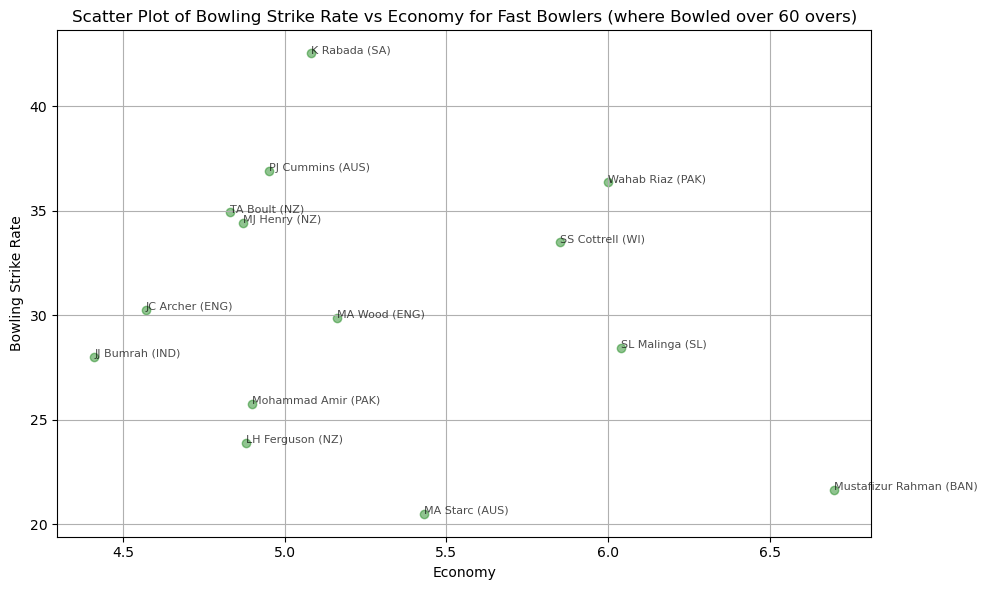

In [36]:
selected_positions = ['Pace', 'L.Pace']
fast_above_60 = bowling[(bowling['Position'].isin(selected_positions)) & (bowling['Overs'] >= 60)]

filtered_fast_above_60 = fast_above_60[~fast_above_60['Player'].isin(all_rounder_names)].copy()
# Create a scatter plot 
plt.figure(figsize=(10, 6))  

# Scatter plot
scatter = plt.scatter(filtered_fast_above_60['Econ'], filtered_fast_above_60['SR'], alpha=0.5, color='forestgreen')

# Adding labels and title
plt.xlabel('Economy')
plt.ylabel('Bowling Strike Rate')
plt.title('Scatter Plot of Bowling Strike Rate vs Economy for Fast Bowlers (where Bowled over 60 overs)')

# Add player names near the dots
for i, player in filtered_fast_above_60.iterrows():
    plt.annotate(player['Player'], (player['Econ'], player['SR']), fontsize=8, alpha=0.7)

# Show the plot
plt.grid(True)
plt.tight_layout()  
plt.show()

In [37]:
# Calculate Bowling_Score (Bowling Strike Rate x Economy)
filtered_fast_above_60['Bowling_Score'] = filtered_fast_above_60['SR'] * filtered_fast_above_60['Econ'].copy()

# Sort the DataFrame by Bowling_Score in ascending order
sorted_fast = filtered_fast_above_60.sort_values(by='Bowling_Score', ascending=True)

# Display the sorted DataFrame with Spinners ranked by Bowling_Score
print(sorted_fast[['Player', 'SR', 'Ave','Econ', 'Wkts', 'Bowling_Score']])

                     Player     SR    Ave  Econ  Wkts  Bowling_Score
0            MA Starc (AUS)  20.51  18.59  5.43    27       111.3693
1          LH Ferguson (NZ)  23.90  19.47  4.88    21       116.6320
4           JJ Bumrah (IND)  28.00  20.61  4.41    18       123.4800
6       Mohammad Amir (PAK)  25.76  21.05  4.90    17       126.2240
2           JC Archer (ENG)  30.25  23.05  4.57    20       138.2425
3   Mustafizur Rahman (BAN)  21.65  24.20  6.70    20       145.0550
5             MA Wood (ENG)  29.88  25.72  5.16    18       154.1808
12            MJ Henry (NZ)  34.42  28.00  4.87    14       167.6254
7             TA Boult (NZ)  34.94  28.17  4.83    17       168.7602
15          SL Malinga (SL)  28.46  28.69  6.04    13       171.8984
13         PJ Cummins (AUS)  36.92  30.50  4.95    14       182.7540
17         SS Cottrell (WI)  33.50  32.66  5.85    12       195.9750
22            K Rabada (SA)  42.54  36.09  5.08    11       216.1032
24         Wahab Riaz (PAK)  36.36

### **Analysis Explanation for Fast-Bowlers:** 

- Between the fast bowlers, it's a tough call as all of them have impressive statistics. After evaluating the Bowling_Score, the top three bowlers identified are **MA Starc, LH Ferguson, and JJ Bumrah.** Notably, the inclusion of left-handed pace bowler MA Starc adds a valuable layer of versatility to our team. Hence, these three fast bowlers have been selected for our lineup.


In [38]:
# Adding the fast bowlers to the team

names_to_extract = ['MA Starc (AUS)','LH Ferguson (NZ)','JJ Bumrah (IND)']

# Extract rows based on the name
filtered_rows = batting[batting['Player'].isin(names_to_extract)]

# Add the extracted rows to team
chosen_11 = pd.concat([chosen_11,filtered_rows])

### **Looking at the Dream 11 Team so far**

In [39]:
chosen_11

,Player,Batting Handedness,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Position,Captain,Wicketkeeper
0,RG Sharma (IND),Right,9,9,1,648,140,81.00,659,98.33,5,1,-,67,14,Opener,No,No
9,JJ Roy (ENG),Right,8,7,0,443,153,63.28,384,115.36,1,4,-,51,12,Opener,No,No
3,KS Williamson (NZ),Right,10,9,2,578,148,82.57,771,74.96,2,2,-,50,3,Top-Order,Yes,No
7,Babar Azam (PAK),Right,8,8,1,474,101*,67.71,540,87.77,1,3,-,50,2,Top-Order,No,No
13,AT Carey (AUS),Left,10,9,3,375,85,62.50,360,104.16,-,3,-,46,2,Middle-Order,No,Yes
2,Shakib Al Hasan (BAN),Left,8,8,1,606,124*,86.57,631,96.03,2,5,-,60,2,All-rounder,No,No
8,BA Stokes (ENG),Left,11,10,3,465,89,66.42,499,93.18,-,5,-,38,11,All-rounder,No,No
120,Imran Tahir (SA),Right,9,4,2,11,10*,5.50,16,68.75,-,-,2,0,0,Tail-Ender,No,No
83,MA Starc (AUS),Left,10,8,2,68,29,11.33,76,89.47,-,-,1,3,2,Lower Middle Order,No,No
134,LH Ferguson (NZ),Right,9,2,1,4,4*,4.00,6,66.66,-,-,1,1,0,Tail-Ender,No,No


## Checking if certain Essential Criteria are present in the team

**1) Captain**

- On looking at the above table, in the second last column titled "Captain", we see a No/Yes depending on whether that player has been the captain for their respective country. 
- We need to have 1 captain in the dream team. As we can see in the table, KS Williamson has been the captain of New Zealand. Since, no other player in the dream team has been a captain, **KS Williamson** is automatically selected as the captain of the dream team.
- If a scenario had occured where more than 1 player had captaincy experience in the dream team, then we would have to choose the player with a higher win/loss ratio.

**2) Wicketkeeper**

Similar to captain, we need to have 1 wicketkeeper in the dream team. As we can see in the last column of the above table, only **AT Carey** has been a wicketkeeper for his country (Australia). Thus, he is automatically selected as the wicketkeeper of the dream team.

**3) Balance of Left and Right-Handed Players**

In the above table, we see 4 left-handed players and 7 right-handed players in the dream team. This indicates a well-rounded balance. In cricket, a balanced team with a mix of left and right-handed players provides strategic advantages. Versatility in batting styles creates a dynamic batting order that forces bowlers to constantly adapt, making it challenging for the opposition. This balance ensures adaptability to different conditions and contributes to overall team effectiveness and success.

**NOTE :** If any of these 3 criterias were not met, for example, if there was no wicketkeeper in the dream team. Then we would have to look at the statistics of all the wicketkeepers that played in the tournament. Choose the wicketkeeper with the best statistics, then see what role he plays in the team (eg. Opener, Top-Order, Middle-Order) and accordingly replace the player in that position in the current dream team.